In [1]:
import time
import requests
import datetime
import pandas as pd
from bs4 import BeautifulSoup

comments_dict = {}
df_all = pd.DataFrame([], columns=['Timestamp', 'Published', 'Headline', 'Link', 'Comments', 'New_Comments'])

Webseite http://www.gamestar.de/news/ wird nur alle 10min erneuert und die Kommentare sind damit dementsprechend 'alt'

In [3]:
def getComments():
    global df_all
    global comments_dict
    
    url = 'http://www.gamestar.de/news/'
    html = requests.get(url).text
    bs = BeautifulSoup(html, 'lxml')

    ts = time.time()
    timestamp = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')

    data = []
    for elem in bs.find('span', {'class':'box-reload'}).findAll('div', {'class':'media news-list article-list m-b-0'}):    
        link = elem.find('a', {'class':'m-r-1'})['href']
        published = elem.find('span', {'class':'info news-info'}).get_text().strip()
        headline = elem.find('span', {'class':'h4 m-b-0 media-heading'}).get_text().strip()
        comments = int(elem.find('span', {'class':'info-small'}).get_text().strip())
        data.append([timestamp, published, headline, link, comments])

    df = pd.DataFrame(data, columns=['Timestamp', 'Published', 'Headline', 'Link', 'Comments'])

    data_new_comments = []
    for article in df.values:
        comments = comments_dict[article[3]] if article[3] in comments_dict.keys() else 0
        new_comments = article[4] - comments
        data_new_comments.append(new_comments)
    df['New_Comments'] = data_new_comments

    if comments_dict:
        df_all = pd.concat([df_all, df])

        if df[df['New_Comments']>0].values.any():
            print(df[df['New_Comments']>0][['Headline', 'New_Comments']].sort_values('New_Comments', ascending=False))
    
    comments_dict = {key:val for key, val in df[['Link', 'Comments']].values}

In [ ]:
while True:
    getComments()
    
    time.sleep(540)
    print('9 Minutes passed')

In [5]:
import matplotlib.pyplot as plt

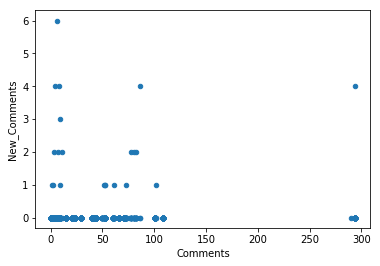

In [11]:
df_all[['Comments', 'New_Comments']].plot(kind='scatter', x='Comments', y='New_Comments')
plt.show()

In [ ]:
from scipy.stats import multivariate_normal

In [176]:
X = np.array(df_all[['Comments', 'New_Comments']].values.tolist())
print('Data:\n', X[:5])

mean = np.mean(X, axis=0)
print('\nMean:\n', mean)

cov = np.cov(X.T)
print('\nCov:\n', cov)

Data:
 [[  0   0]
 [290   0]
 [  1   0]
 [  1   0]
 [  5   0]]

Mean:
 [  3.86777778e+01   3.65079365e-02]

Cov:
 [[  2.89989132e+03   6.17015268e-01]
 [  6.17015268e-01   1.11454039e-01]]


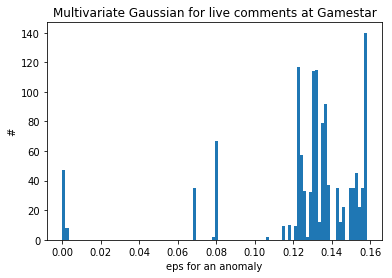

In [186]:
pred = multivariate_normal.pdf(X, mean=mean, cov=cov)

plt.hist(pred, bins=100)
plt.title('Multivariate Gaussian for live comments at Gamestar')
plt.xlabel('eps for an anomaly')
plt.ylabel('#')
plt.show()

Data:
 [[-0.71852695 -0.10939861]
 [ 4.66887705 -0.10939861]
 [-0.69994969 -0.10939861]
 [-0.69994969 -0.10939861]
 [-0.62564067 -0.10939861]]

Mean:
 [  1.16309079e-17  -2.18299805e-17]

Cov:
 [[ 1.00079428  0.03434804]
 [ 0.03434804  1.00079428]]


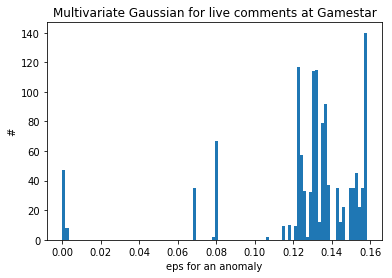

In [204]:
X = np.array(df_all[['Comments', 'New_Comments']].values.tolist())

mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X-mean)/std

print('Data:\n', X[:5])

mean = np.mean(X, axis=0)
print('\nMean:\n', mean)

cov = np.cov(X.T)
print('\nCov:\n', cov)

pred = multivariate_normal.pdf(X, mean=mean, cov=cov)

plt.hist(pred, bins=100)
plt.title('Multivariate Gaussian for live comments at Gamestar')
plt.xlabel('eps for an anomaly')
plt.ylabel('#')
plt.show()

In [217]:
a = np.array([[1,2],[3,4]])
a

array([[1, 2],
       [3, 4]])

In [218]:
np.apply_along_axis(np.log, 0, a[:,1])

array([ 0.69314718,  1.38629436])

In [209]:
np.log(2)

0.69314718055994529

In [187]:
pred<0.01

array([False,  True, False, ..., False, False, False], dtype=bool)

In [189]:
df_all[pred<0.01]

,Timestamp,Published,Headline,Link,Comments,New_Comments
1,2017-11-03 11:42:43,10:48,Assassin's Creed: Origins - Ubisoft streitet h...,/artikel/assassins-creed-origins-kopierschutz-...,290,0
1,2017-11-03 11:43:43,11:26,Call of Duty: WW2 - Wertungsspiegel: Meinungen...,/artikel/call-of-duty-ww2-wertungsspiegel-mein...,4,4
2,2017-11-03 11:43:43,10:48,Assassin's Creed: Origins - Ubisoft streitet h...,/artikel/assassins-creed-origins-kopierschutz-...,294,4
4,2017-11-03 11:43:43,10:27,Animal Super Squad - Neues Spiel von Goat Simu...,/artikel/animal-super-squad-neues-spiel-von-go...,2,1
6,2017-11-03 11:43:43,09:33,Donald Trump - Twitter-Mitarbeiter sperrte Acc...,/artikel/donald-trump-twitter-mitarbeiter-sper...,78,2
16,2017-11-03 11:43:43,11:51,Total War - Mehrere Spiele mit historischem Se...,/artikel/total-war-mehrere-spiele-mit-historis...,52,1
2,2017-11-03 11:44:44,10:48,Assassin's Creed: Origins - Ubisoft streitet h...,/artikel/assassins-creed-origins-kopierschutz-...,294,0
2,2017-11-03 11:45:44,10:48,Assassin's Creed: Origins - Ubisoft streitet h...,/artikel/assassins-creed-origins-kopierschutz-...,294,0
2,2017-11-03 11:46:44,10:48,Assassin's Creed: Origins - Ubisoft streitet h...,/artikel/assassins-creed-origins-kopierschutz-...,294,0
2,2017-11-03 11:47:45,10:48,Assassin's Creed: Origins - Ubisoft streitet h...,/artikel/assassins-creed-origins-kopierschutz-...,294,0


In [190]:
np.log(10)

2.3025850929940459

In [191]:
np.log(100)

4.6051701859880918

In [202]:
np.log(3)

1.0986122886681098